In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [211]:
df = pd.read_csv('C:\\Users\\YN\\OneDrive\\Desktop\\Assignment 6\\Iris.csv')
df
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [213]:
num_of_nulls = df.isnull().sum()
num_of_nulls

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [215]:
clean_data = df.drop(columns=['Id'])
clean_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [217]:
label_encoder = LabelEncoder()
clean_data['Species'] = label_encoder.fit_transform(clean_data['Species'])
clean_data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [222]:
X = clean_data.drop(columns=["Species"])
y = clean_data["Species"]

Learn from (features in X).

In [224]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Predict (target in y)

In [227]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

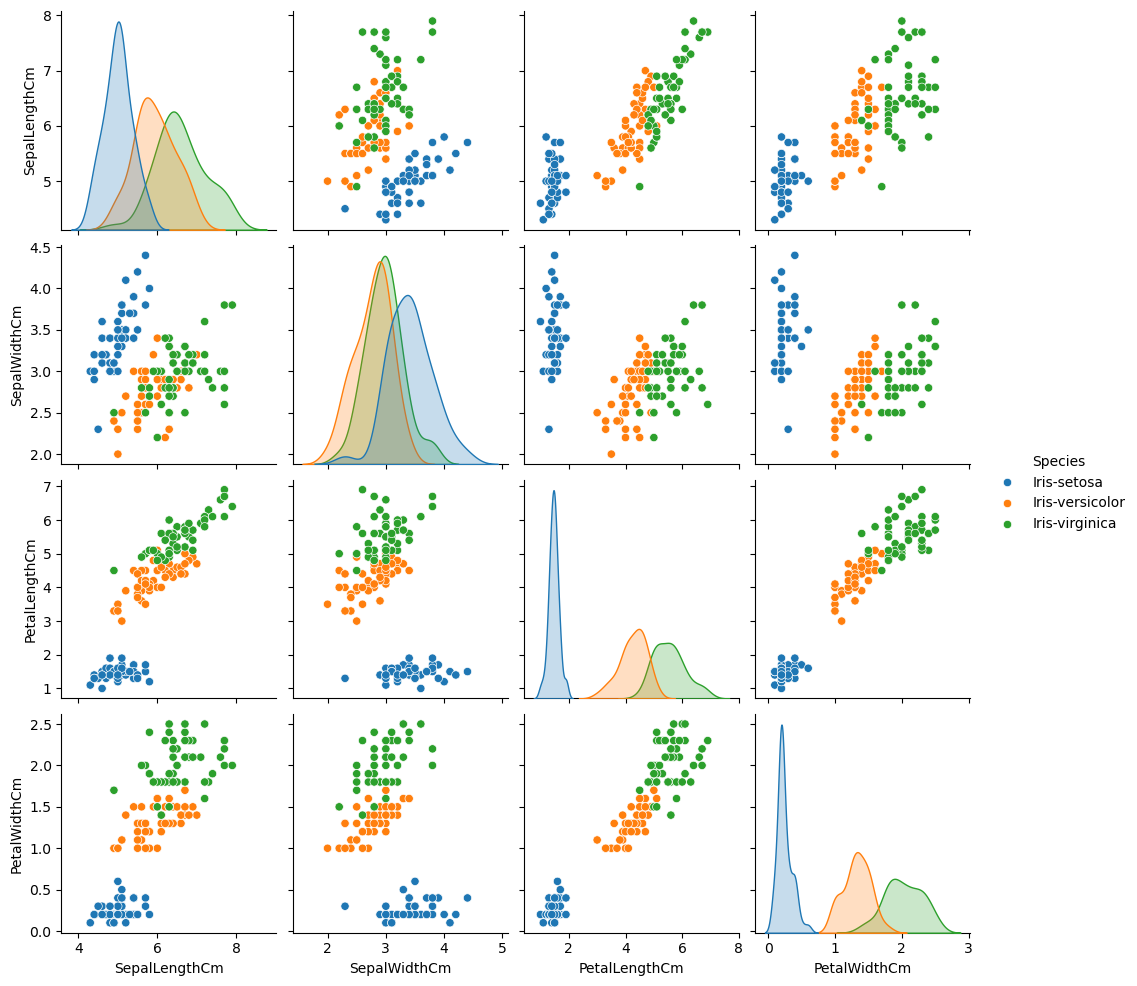

In [167]:
sns.pairplot(df.drop('Id', axis=1), hue='Species')
plt.show()

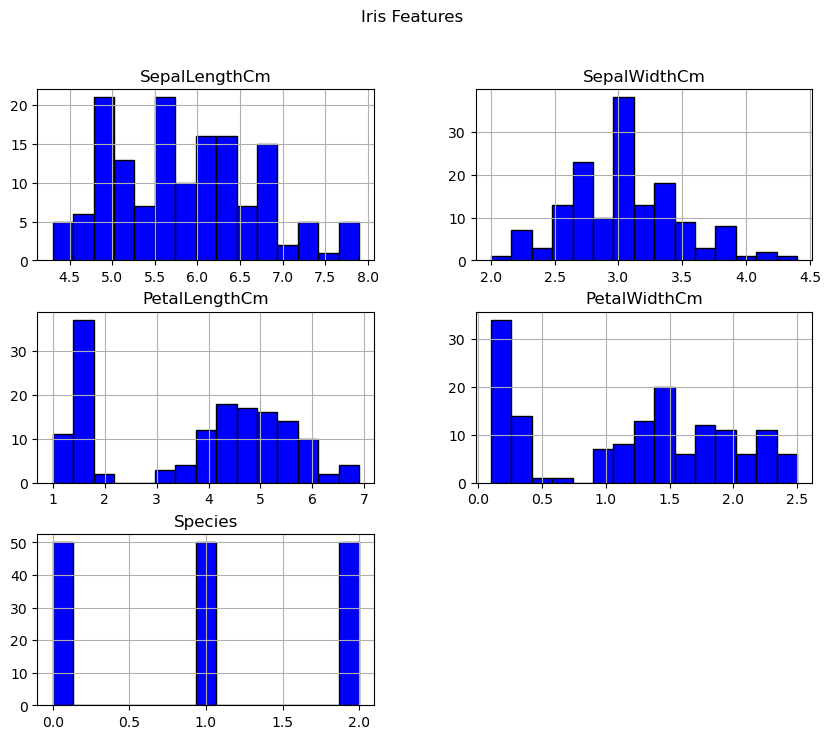

In [169]:
clean_data.hist(bins=15, figsize=(10, 8), edgecolor='black', color='blue')
plt.suptitle("Iris Features")
plt.show()

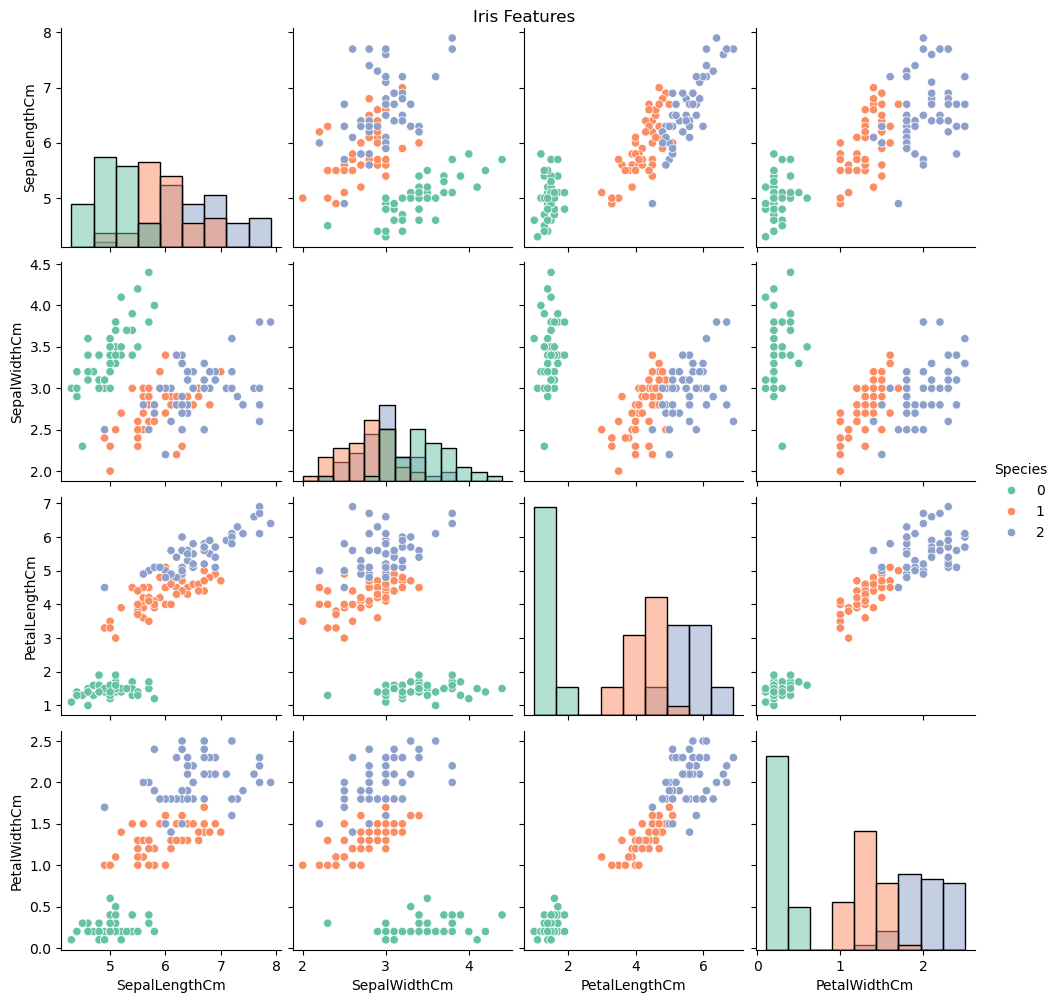

In [171]:
sns.pairplot(clean_data, hue="Species", diag_kind="hist", palette="Set2")
plt.suptitle("Iris Features", y=1.00)
plt.show()

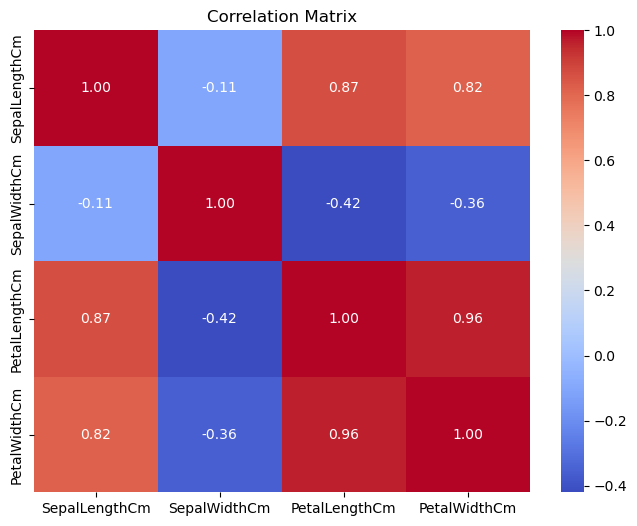

In [173]:
correlation_matrix = clean_data.drop(columns=["Species"]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [177]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-1.72156775, -0.32483982, -1.34703555, -1.32016847],
       [-1.12449223, -1.22612948,  0.41429037,  0.65186742],
       [ 1.14439475, -0.55016223,  0.58474127,  0.25746024],
       [-1.12449223,  0.12580502, -1.29021859, -1.45163753],
       [-0.40800161, -1.22612948,  0.13020555,  0.12599118],
       [ 0.54731923, -1.22612948,  0.6983752 ,  0.91480554],
       [-0.2885865 , -0.77548465,  0.24383948,  0.12599118],
       [ 0.54731923, -0.55016223,  0.75519216,  0.3889293 ],
       [ 2.21913069, -0.0995174 ,  1.32336182,  1.44068178],
       [ 2.21913069,  1.70306192,  1.66426361,  1.30921272],
       [ 2.09971558, -0.0995174 ,  1.60744665,  1.17774366],
       [ 0.18907392, -0.32483982,  0.41429037,  0.3889293 ],
       [-1.00507713, -2.35274155, -0.15387928, -0.268416  ],
       [-0.04975629, -0.77548465,  0.18702251, -0.268416  ],
       [-0.04975629, -1.00080706,  0.13020555, -0.00547788],
       [-1.36332244,  0.35112743, -1.23340162, -1.32016847],
       [-0.88566202,  1.

In [179]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.72156775, -0.0995174 , -1.40385252, -1.32016847],
       [ 0.30848902, -0.0995174 ,  0.64155823,  0.78333648],
       [-1.12449223, -1.45145189, -0.26751321, -0.268416  ],
       [-1.00507713, -1.67677431, -0.26751321, -0.268416  ],
       [-1.72156775,  0.35112743, -1.40385252, -1.32016847],
       [ 0.54731923,  0.57644985,  0.5279243 ,  0.52039836],
       [-1.48273754,  1.25241709, -1.57430342, -1.32016847],
       [-0.52741671,  0.80177226, -1.17658466, -1.32016847],
       [ 0.78614944, -0.0995174 ,  0.81200913,  1.0462746 ],
       [-0.52741671, -0.0995174 ,  0.41429037,  0.3889293 ],
       [ 1.74147027, -0.32483982,  1.43699575,  0.78333648],
       [ 1.26380985,  0.12580502,  0.75519216,  1.44068178],
       [ 0.78614944, -0.0995174 ,  1.15291092,  1.30921272],
       [ 0.66673433,  0.35112743,  0.41429037,  0.3889293 ],
       [-1.00507713,  0.80177226, -1.29021859, -1.32016847],
       [-1.00507713,  0.57644985, -1.34703555, -1.32016847],
       [-0.04975629,  2.

In [181]:
model=LogisticRegression()
model.fit(X_train,y_train)
print("Accuracy: ",model.score(X_test,y_test)*100)

Accuracy:  96.66666666666667


In [183]:
scaler = StandardScaler()
scaler 

StandardScaler()

In [185]:
log_reg = LogisticRegression()
log_reg 

LogisticRegression()

In [189]:
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_log_reg

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [107]:
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_acc

0.9333333333333333

In [108]:
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf 

SVC(kernel='linear', random_state=42)

In [109]:
svm_clf.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [110]:
y_pred_svm = svm_clf.predict(X_test_scaled)
y_pred_svm

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [111]:
svm_clf_acc = accuracy_score(y_test, y_pred_svm)
svm_clf_acc

1.0

In [112]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [114]:
kmeans_labels = kmeans.fit_predict(X)
kmeans_labels

C:\Users\YN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

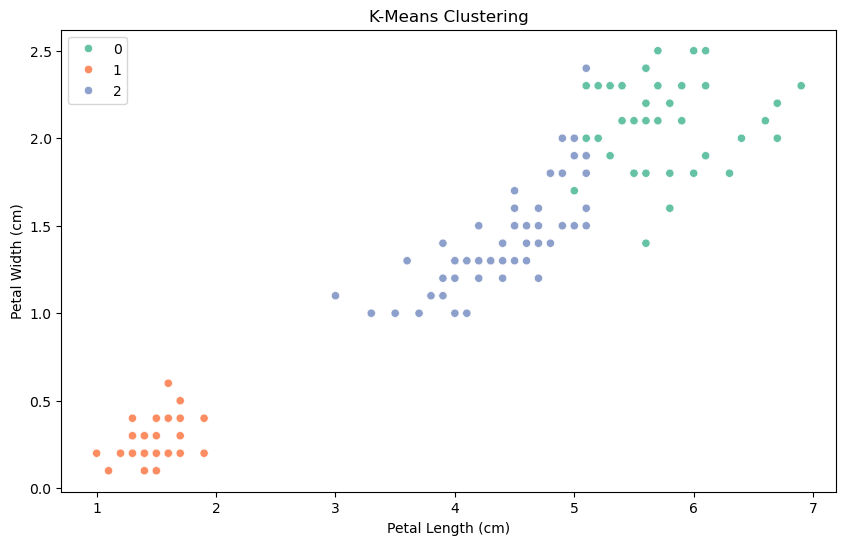

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue=kmeans_labels, palette="Set2", data=clean_data, legend='full')
plt.title("K-Means Clustering")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

In [137]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [140]:
X_pca = pca.fit_transform(X)

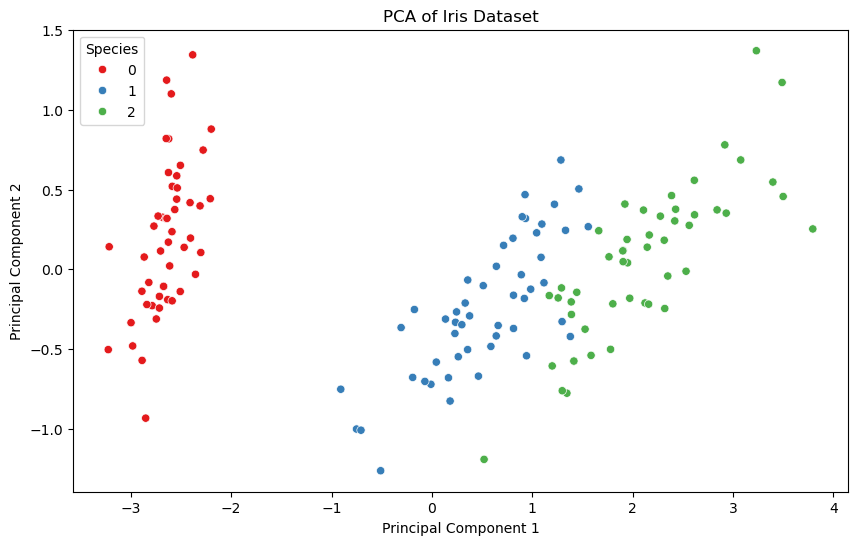

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", legend='full')
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [144]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

# model fitting
model.fit(X_train,y_train)

# model accuracy
print("Accuracy(Logistic Regression): ",model.score(X_test,y_test)*100)

Accuracy(Logistic Regression):  96.66666666666667
